## *Project of ML*

## Real Estate

In [1]:
# Import the Library

import pandas as pd
import numpy as pn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the Data Set

df = pd.read_csv('BostonHousing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

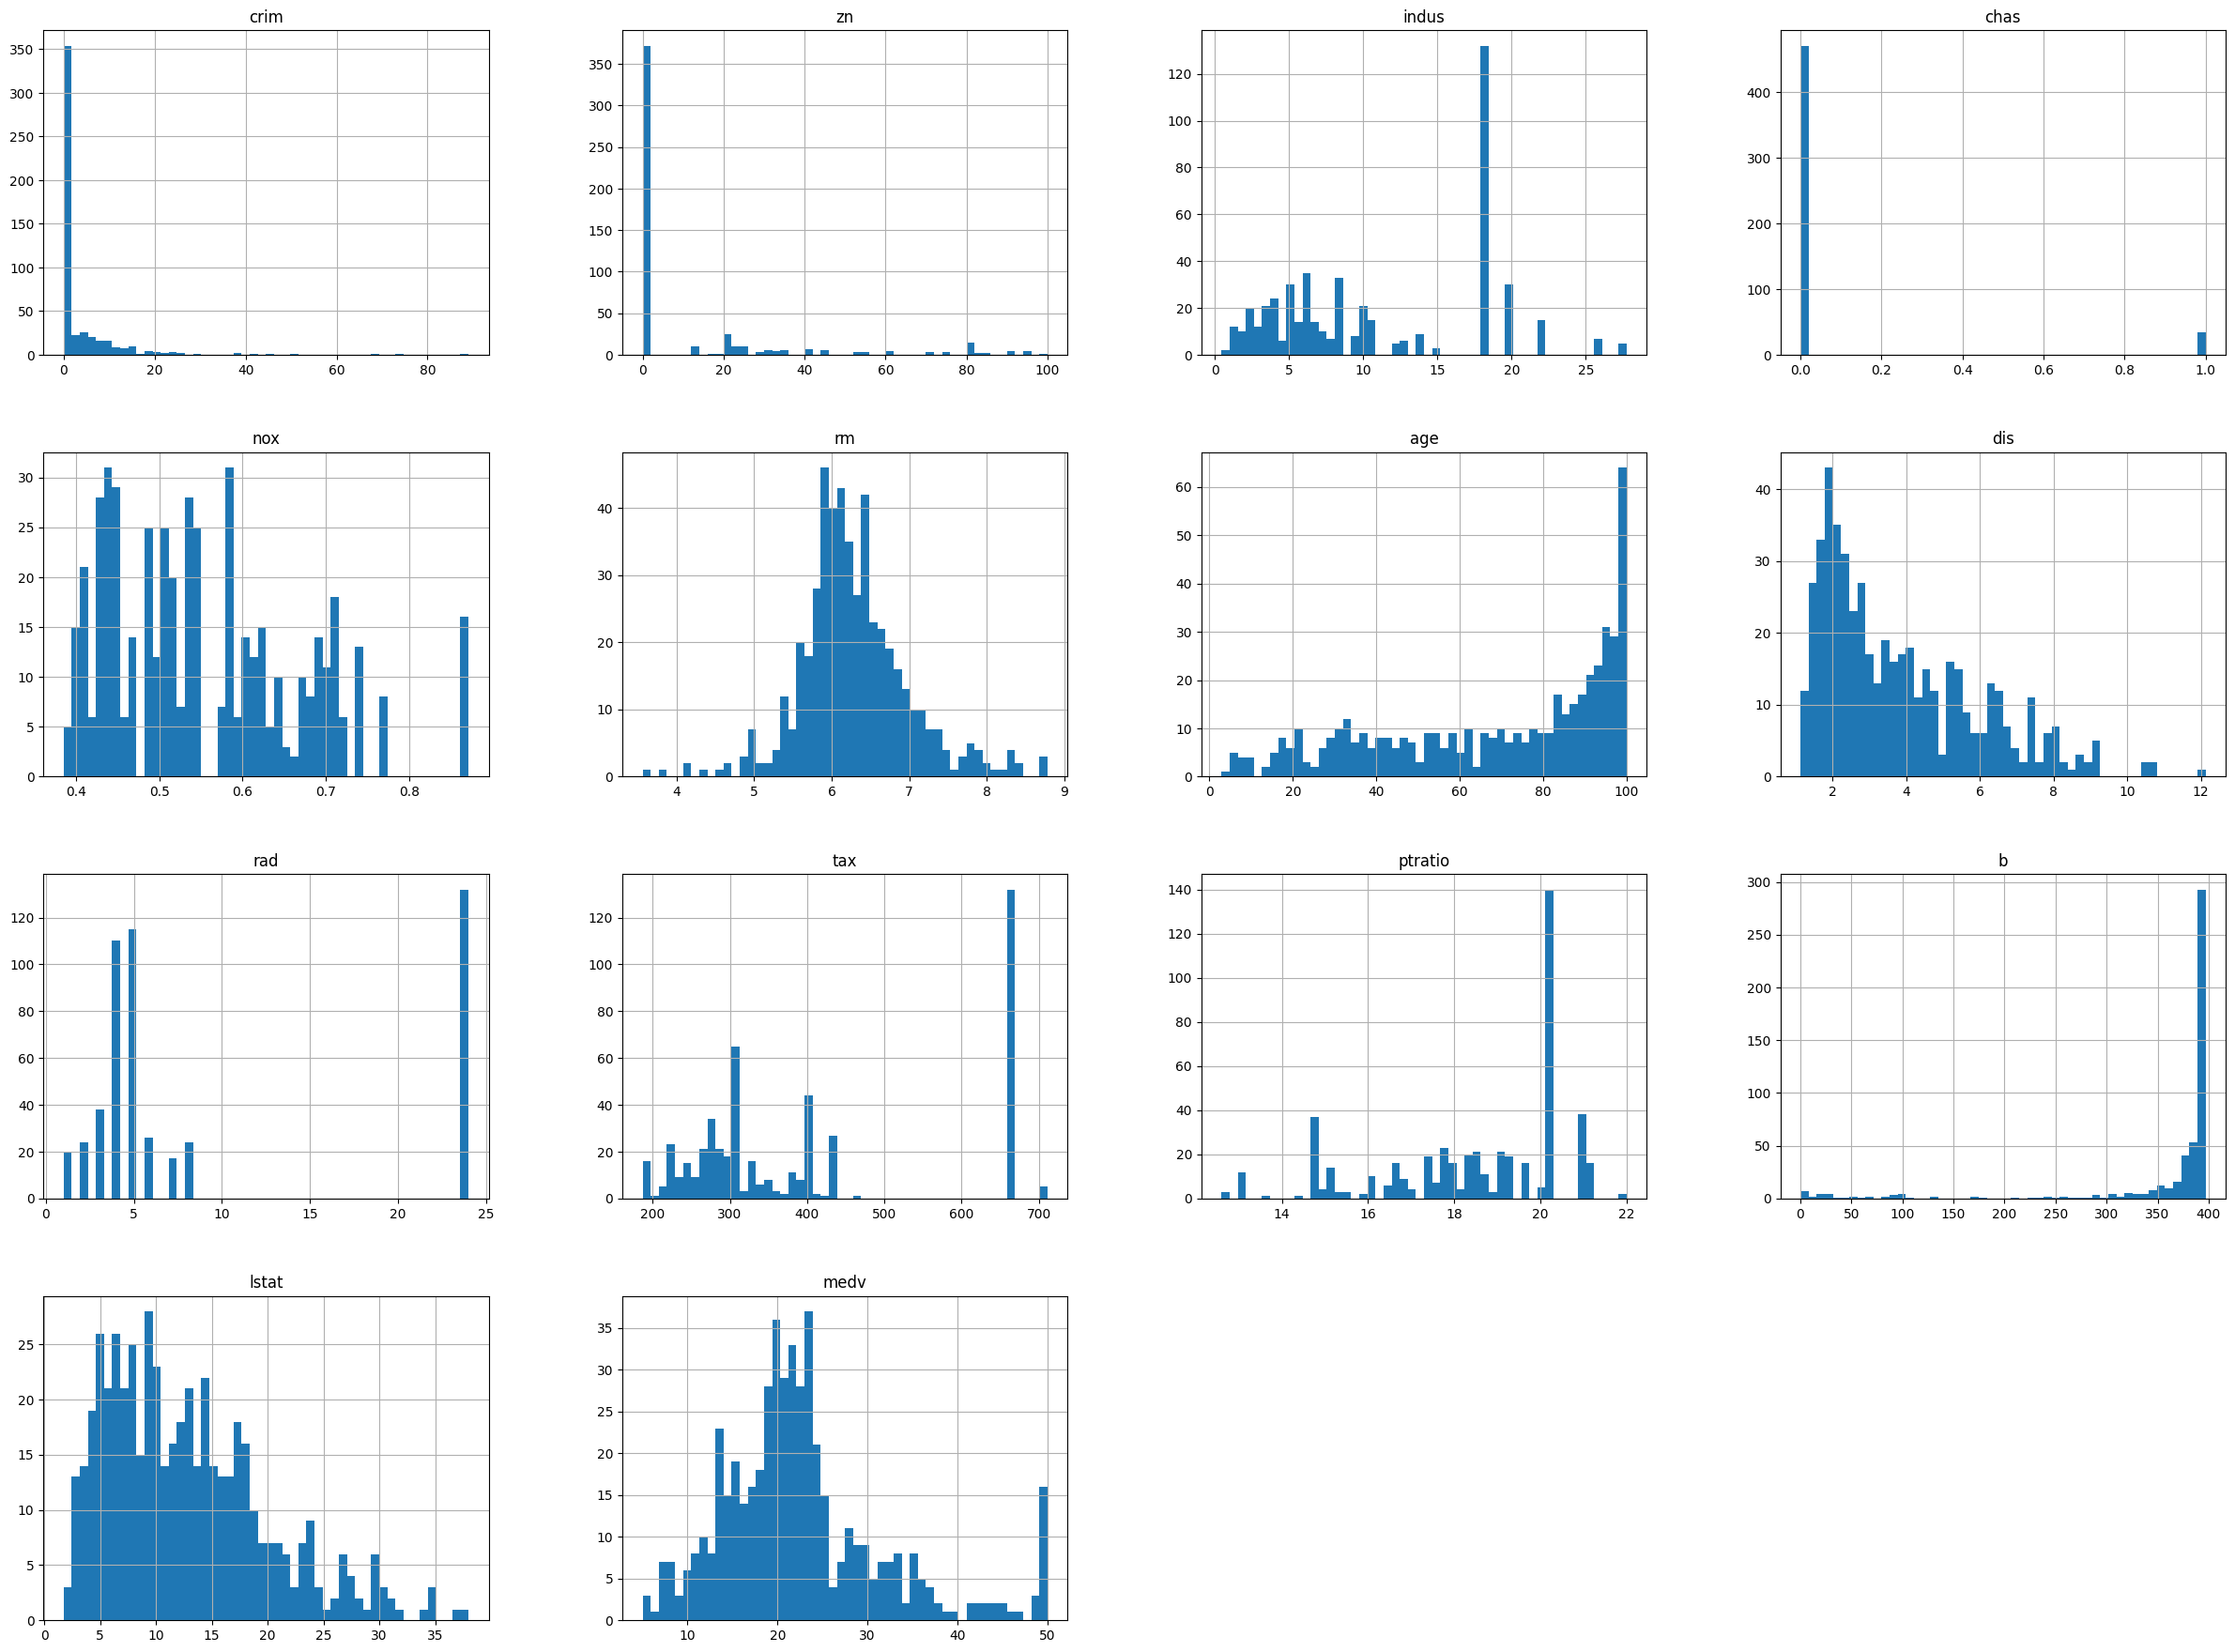

In [6]:
df.hist(bins = 50 , figsize = (30,22))

## Split the DataSet in Test and Train

In [7]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df , test_size = 0.2 , random_state = 45)

In [8]:
print("Rows for Train Set : ", len(train_set))
print("Rows for Test Set : ", len(test_set))

Rows for Train Set :  404
Rows for Test Set :  102


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 45)
for train_index , test_index in split.split(df , df['chas']):
    strat_test_set = df.loc[test_index]
    strat_train_set = df.loc[train_index]

In [10]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 283 to 415
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     102 non-null    float64
 1   zn       102 non-null    float64
 2   indus    102 non-null    float64
 3   chas     102 non-null    int64  
 4   nox      102 non-null    float64
 5   rm       102 non-null    float64
 6   age      102 non-null    float64
 7   dis      102 non-null    float64
 8   rad      102 non-null    int64  
 9   tax      102 non-null    int64  
 10  ptratio  102 non-null    float64
 11  b        102 non-null    float64
 12  lstat    102 non-null    float64
 13  medv     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [11]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 197 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       399 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  b        404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [12]:
strat_test_set.count()

crim       102
zn         102
indus      102
chas       102
nox        102
rm         102
age        102
dis        102
rad        102
tax        102
ptratio    102
b          102
lstat      102
medv       102
dtype: int64

In [13]:
strat_train_set['chas'].value_counts()

chas
0    376
1     28
Name: count, dtype: int64

In [14]:
strat_test_set['chas'].value_counts()

chas
0    95
1     7
Name: count, dtype: int64

In [15]:
95/7

13.571428571428571

In [16]:
df = strat_train_set.copy()

## Let's Check Correlations

In [17]:
corr_matrix = df.corr()

In [18]:
corr_matrix['medv'].sort_values(ascending =False)

medv       1.000000
rm         0.670198
zn         0.322580
b          0.306559
dis        0.228136
chas       0.182732
age       -0.343107
rad       -0.368549
crim      -0.391386
nox       -0.403932
tax       -0.453907
indus     -0.459745
ptratio   -0.493436
lstat     -0.735652
Name: medv, dtype: float64

In [19]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

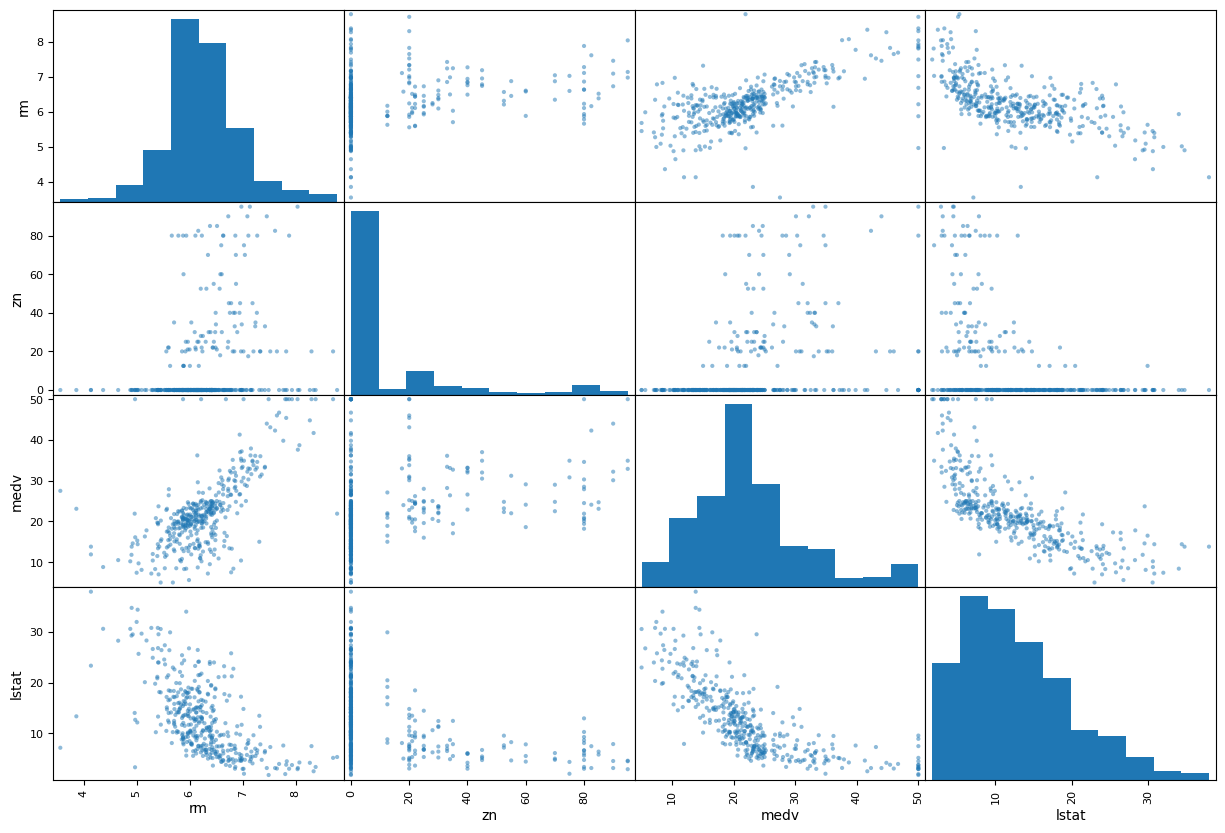

In [20]:
attributes = ['rm' , 'zn' , 'medv','lstat']
scatter_matrix(df[attributes] , figsize = (15,10))

## Attributes Combination

In [21]:
df['tpm'] = df['tax']

In [22]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,tpm
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3,329
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6,307
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70,27.9,245
29,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307,21.0,380.23,11.98,21.0,307
246,0.33983,22.0,5.86,0,0.431,6.108,34.9,8.0555,7,330,19.1,390.18,9.16,24.3,330


In [23]:
corr_matrix['medv'].sort_values(ascending =False)

medv       1.000000
rm         0.670198
zn         0.322580
b          0.306559
dis        0.228136
chas       0.182732
age       -0.343107
rad       -0.368549
crim      -0.391386
nox       -0.403932
tax       -0.453907
indus     -0.459745
ptratio   -0.493436
lstat     -0.735652
Name: medv, dtype: float64

<Axes: xlabel='rm', ylabel='medv'>

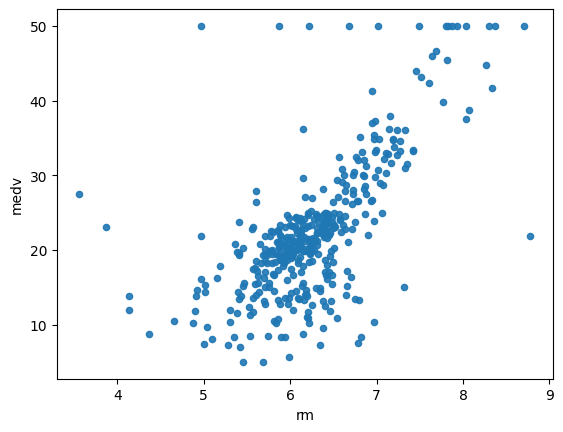

In [24]:
df.plot(kind = 'scatter' , x = 'rm' , y = 'medv' , alpha = 0.9)

In [25]:
df = strat_train_set.drop('medv' , axis = 1 )
df_labels = strat_train_set['medv'].copy()

## Missing Attributs

In [26]:
ab = df.dropna(subset = ['rm'])
ab.shape

(399, 13)

In [27]:
df.drop('rm' , axis = 1).shape
# DataSet not be Change

(404, 12)

In [28]:
median = df['rm'].median()

In [29]:
print(median)

6.193


In [30]:
df['rm'].fillna(median)

197    7.107
226    8.040
292    6.630
29     6.674
246    6.108
       ...  
159    6.510
37     5.850
397    5.747
208    6.064
172    5.572
Name: rm, Length: 404, dtype: float64

In [31]:
df.shape

(404, 13)

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(df)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.6888e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1930e+00, 7.9500e+01, 3.0793e+00, 5.0000e+00, 3.3600e+02,
       1.9100e+01, 3.9134e+02, 1.1360e+01])

In [34]:
imputer.statistics_.shape

(13,)

In [35]:
pm = imputer.transform(df)

In [36]:
pm_ds_tr = pd.DataFrame(pm , columns = df.columns)

In [37]:
pm_ds_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.716923,11.110149,11.384777,0.069307,0.557979,6.252616,69.275990,3.754698,9.826733,415.282178,18.473020,360.439480,12.701312
std,8.455136,22.833976,6.930255,0.254290,0.117396,0.693465,28.280361,2.156837,8.839887,170.538323,2.150016,86.011519,7.105235
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083545,0.000000,5.190000,0.000000,0.449000,5.875750,44.850000,2.009600,4.000000,284.000000,17.000000,375.472500,6.990000
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.193000,79.500000,3.079300,5.000000,336.000000,19.100000,391.340000,11.360000
75%,3.896877,12.500000,18.100000,0.000000,0.631000,6.582500,94.725000,5.117025,24.000000,666.000000,20.200000,396.250000,17.092500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit_learn Design

Primarily Three Type of Object
1. Estimators  ----> It Estimate Some Parameter based on a dataset

2. Transform ----> Its Transform to DataFrame takes inputs and gives Output

3. Preditcors  ----> Its Predict the Output

## Feature Scalling 

his method use for Make Same Value of Attributs it has Two Method

1. MinMx Scalling (Normalization)  --->  [(Value - min)/(max - min)] this Forula use for Normal

2.  Standardization  ----> [(Value - min)/std]   Use for Satnd...

## Create the PipLines

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
from sklearn.preprocessing import StandardScaler
my_pipline = Pipeline([('imputer' ,SimpleImputer(strategy = 'median')) , ('std_scaler' , StandardScaler())])
# Std_scaler is use add pipelines

In [40]:
df_num_tr = my_pipline.fit_transform(pm_ds_tr)

In [41]:
df_num_tr

array([[-0.43462502,  3.02072976, -1.42520143, ..., -2.73500329,
        -0.07135184, -0.57653054],
       [-0.39489817, -0.48716546, -0.74906425, ..., -0.49969399,
         0.31360827, -1.34874919],
       [-0.43586959,  3.02072976, -0.92965644, ...,  0.338547  ,
         0.42442836, -1.12751136],
       ...,
       [ 0.4683545 , -0.48716546,  0.97017346, ...,  0.80423644,
         0.38019345,  1.0172273 ],
       [-0.42406096, -0.48716546, -0.11482445, ...,  0.05913334,
         0.24306523,  0.27601013],
       [-0.42367373, -0.48716546, -1.05968282, ..., -0.87224554,
         0.42442836,  0.2802376 ]])

In [42]:
df_num_tr.shape

(404, 13)

## Select Model for Accurate Result for Home_Estates

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_num_tr , df_labels)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error
df_prediction = model.predict(df_num_tr)
lin_mse = mean_squared_error(df_labels , df_prediction)
lin_rmse = pn.sqrt(lin_mse)

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , df_num_tr , df_labels , scoring = "neg_mean_squared_error", cv= 10)
lin_mse_scores = pn.sqrt(-scores)

In [46]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean of Scores : ", scores.mean())
    print("Standard Deviation of Scores : " , scores.std())

print_scores(lin_mse_scores)

Scores :  [4.38387532 5.0720163  4.86776043 4.93321698 5.1487004  5.763227
 5.02543991 5.99527777 4.24342412 3.52165132]
Mean of Scores :  4.895458953767242
Standard Deviation of Scores :  0.6819992021425461


In [47]:
some_data = df.iloc[:5]

In [48]:
some_labels = df_labels.iloc[:5]

In [49]:
prepared_data = my_pipline.transform(some_data)

In [50]:
model.predict(prepared_data)

array([32.15898264, 37.28020686, 31.683784  , 20.69234435, 20.01285076])

In [51]:
list(some_labels)

[30.3, 37.6, 27.9, 21.0, 24.3]

## Evalutation the Model with

In [52]:
from sklearn.metrics import mean_squared_error
df_prediction = model.predict(df_num_tr)
random_mse = mean_squared_error(df_labels , df_prediction)
random_rmse = pn.sqrt(lin_mse)

In [53]:
lin_mse   # Using Linear_Regression Model

22.529553322197774

In [54]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()
model_tree.fit(df_num_tr , df_labels)

DecisionTreeRegressor()

In [55]:
model.predict(prepared_data)

array([32.15898264, 37.28020686, 31.683784  , 20.69234435, 20.01285076])

In [56]:
from sklearn.metrics import mean_squared_error
df_prediction = model_tree.predict(df_num_tr)
random_mse = mean_squared_error(df_labels , df_prediction)
random_rmse = pn.sqrt(random_mse)

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_tree , df_num_tr , df_labels , scoring = "neg_mean_squared_error", cv= 10)
tree_mse_scores = pn.sqrt(-scores)

In [58]:
random_mse   # Using DecisionTree Model

0.0

In [59]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean of Scores : ", scores.mean())
    print("Standard Deviation of Scores : " , scores.std())

print_scores(tree_mse_scores)

Scores :  [3.81773781 4.04517177 7.19696752 2.93971958 5.72653909 4.04029702
 3.32321381 6.45995356 3.76842142 4.71685806]
Mean of Scores :  4.6034879637962405
Standard Deviation of Scores :  1.3340751455642994


In [60]:
from sklearn.ensemble import RandomForestRegressor
model_Random = RandomForestRegressor()
model_Random.fit(df_num_tr , df_labels)

RandomForestRegressor()

In [61]:
from sklearn.metrics import mean_squared_error
df_prediction = model.predict(df_num_tr)
Rndom_mse = mean_squared_error(df_labels , df_prediction)
Rndom_rmse = pn.sqrt(Rndom_mse)

In [62]:
Rndom_rmse

4.746530661672563

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_Random , df_num_tr , df_labels , scoring = "neg_mean_squared_error", cv= 10)
Rndom_mse_scores = pn.sqrt(-scores)

In [64]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean of Scores : ", scores.mean())
    print("Standard Deviation of Scores : " , scores.std())

print_scores(Rndom_mse_scores)

Scores :  [2.68566692 3.40231569 2.77694661 3.11921279 4.63269285 3.4728524
 2.63555798 4.51628537 2.77673838 2.91076332]
Mean of Scores :  3.2929032313096274
Standard Deviation of Scores :  0.6961126542459576


## Useing Cross Validation ---> it's use for Seprate Error Finding 

In [65]:
list(tree_mse_scores)

[3.8177378054575084,
 4.045171768188138,
 7.196967518574378,
 2.939719581781942,
 5.72653909442693,
 4.040297018784634,
 3.3232138059414713,
 6.459953560204594,
 3.76842142017052,
 4.716858064432297]

In [66]:
list(lin_mse_scores)

[4.383875320570288,
 5.0720162963665585,
 4.867760428126977,
 4.933216977387784,
 5.148700400294658,
 5.7632269970331595,
 5.025439914654606,
 5.995277767398305,
 4.243424120653827,
 3.5216513151862596]

In [67]:
list(Rndom_mse_scores)

[2.685666919943359,
 3.402315689171197,
 2.776946607951731,
 3.119212787649178,
 4.632692853514038,
 3.472852397525698,
 2.6355579769756545,
 4.516285373512177,
 2.776738383427578,
 2.910763323425661]

In [68]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean of Scores : ", scores.mean())
    print("Standard Deviation of Scores : " , scores.std())

In [69]:
print_scores(lin_mse_scores)    ## Using Linear Model 

Scores :  [4.38387532 5.0720163  4.86776043 4.93321698 5.1487004  5.763227
 5.02543991 5.99527777 4.24342412 3.52165132]
Mean of Scores :  4.895458953767242
Standard Deviation of Scores :  0.6819992021425461


In [70]:
print_scores(tree_mse_scores)

Scores :  [3.81773781 4.04517177 7.19696752 2.93971958 5.72653909 4.04029702
 3.32321381 6.45995356 3.76842142 4.71685806]
Mean of Scores :  4.6034879637962405
Standard Deviation of Scores :  1.3340751455642994


In [71]:
print_scores(Rndom_mse_scores)   ## Using Random Forest Model

Scores :  [2.68566692 3.40231569 2.77694661 3.11921279 4.63269285 3.4728524
 2.63555798 4.51628537 2.77673838 2.91076332]
Mean of Scores :  3.2929032313096274
Standard Deviation of Scores :  0.6961126542459576


## Saving the Model

In [72]:
from joblib import dump , load
dump(model , 'Dragon.joblib')
dump(model_tree , 'Dragon.joblib')
dump(model_Random , 'Dragon.joblib')

['Dragon.joblib']

## Tesitng Model on test DataSet

In [73]:
x_test = strat_test_set.drop('medv' , axis = 1)
y_test = strat_test_set['medv'].copy()
x_test_prepared = my_pipline.transform(x_test)
final_predictions = model_Random.predict(x_test_prepared)
final_mse = mean_squared_error(y_test , final_predictions)
final_rmse = pn.sqrt(final_mse)

In [74]:
final_rmse

2.854866594870905

In [75]:
prepared_data[0]

array([-0.43462502,  3.02072976, -1.42520143, -0.27288841, -1.31324583,
        1.23357856, -1.15686311,  1.64996625, -0.88648614, -0.50656744,
       -2.73500329, -0.07135184, -0.57653054])

## Using the Model Prediction find the Price

In [76]:
from joblib import dump , load
import numpy as pn
model_random = load('Dragon.joblib')

In [77]:
features = pn.array([[-0.43462502,  3.02072976, -1.42520143, -0.27288841, -1.31324583,
         1.23357856, -1.15686311,  1.64996625, -0.88648614, -0.50656744,
        -2.73500329, -0.07135184, -0.057653054]])
model_random.predict(features)

array([28.708])